**Task-2**<br>
**Presented by Komal Joshi**

This task is about unsupervised learning technique known as clustering. I am going to perform clustering on very well known Iris dataset.

Clustering is basically a process of seperating a dataset into groups. The datapoints or instances of each particular groups are similar to eachother and are dissimilar to the other instances of groups.

**Algorithm of clustering**

1. **Initializing**
      : We initialize the centroids of the particular groups randomly at first after deciding the value of k.
      
       
2. **Assigning the datapoints to a particular cluster**
      : We find the distance between the data points and the centroids and keep on assigning the data instances to a particular         centroid with which the distance found is minimum.
      
      
3. **Updating centroids**
     : The centroid of the assigned data points may not always be at required place. So, we need to update the centroid at its        particular place by taking mean of the data-points assigned to that particular cluster.
     
     
4. **Looping**
     : Process 2 and 3 runs in loop. (i.e. updation and assigning the nearest data-instances to that particular cluster keeps on taking place till there is no change in updation.
       
       
5. **Break**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Stage 1 : Initialization Stage

### Creating dataFrame structure 

In [24]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

<font color=blue>From the pairplots in previous task-1, it is clearly visible that the classes 0,1 and 2 are very well seperated if petal length and petal width features are taken in consideration. class 0(setosa) is very well seperated from rest of the two classes. class 1 (versicolor) and class 2 (virginica) are overlapping a bit. But, petal length and petal width graph gives the least amount of overlapping. So, we will drop the other features.</font>

In [27]:
df = pd.DataFrame({
    'x': iris.data[:,2],
    'y': iris.data[:,3],
    'cluster' : iris.target
})

In [28]:
df

,x,y,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


<font color = blue>Now, we will find the means of petal length and petal width with respect to corresponding classes denotes as 0,1 and 2. Here, the number of clusters are 3. Thus, we will get our 3 required centroids.</font>

In [29]:
centroids = {}
for i in range(3):
    result_list = []
    result_list.append(df.loc[df['cluster'] == i]['x'].mean())
    result_list.append(df.loc[df['cluster'] == i]['y'].mean())
    
    centroids[i] = result_list

In [30]:
centroids

{0: [1.4620000000000002, 0.2459999999999999],
 1: [4.26, 1.3259999999999998],
 2: [5.552, 2.026]}

### Plotting Points

Text(0, 0.5, 'petal Width')

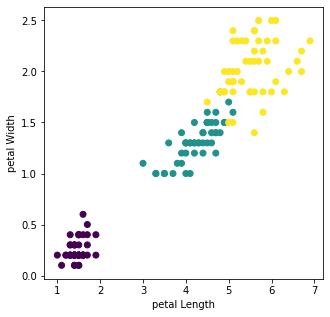

In [31]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=iris.target)
plt.xlabel('petal Length' )
plt.ylabel('petal Width')

### Defining colors and ploting centroids for all clusters

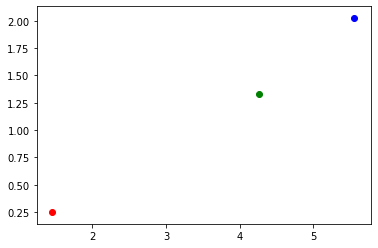

In [32]:
colmap = {0: 'r', 1: 'g', 2: 'b'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
plt.show()

### Showing complete graph

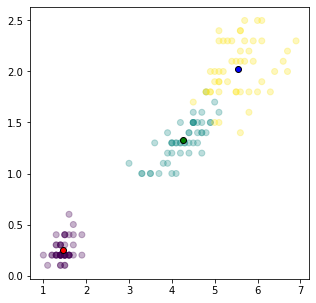

In [33]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=iris.target,alpha = 0.3)
colmap = {0: 'r', 1: 'g', 2: 'b'}
col = [0,1]
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], c=colmap[i], edgecolor='k')
plt.show()

# Stage 2: Assignment Stage

### Assignment function : Calculating distance and updating dataFrame

<font color=blue>Here, we are creating one assignment function which adds distances from centroid 0, 1 and 2 to out dataframe and also adds a column denoting which centroid the corresponding datapoint is closest to and assigns a color to it. We are using eucledian distance for calculating the distance between data-point and centroids. </font>

In [39]:
def assignment(df, centroids):
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1) #for finding minimum dist of a point from centroids
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # for getting int centroids and removing string
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [40]:
df = assignment(df, centroids)

In [41]:
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,1.4,0.2,0,0.077201,3.073675,4.535789,0,r
1,1.4,0.2,0,0.077201,3.073675,4.535789,0,r
2,1.3,0.2,0,0.168404,3.166935,4.627503,0,r
3,1.5,0.2,0,0.059666,2.980852,4.444432,0,r
4,1.4,0.2,0,0.077201,3.073675,4.535789,0,r
...,...,...,...,...,...,...,...,...
145,5.2,2.3,2,4.265157,1.353616,0.446072,2,b
146,5.0,1.9,2,3.905529,0.936523,0.566198,2,b
147,5.2,2.0,2,4.129063,1.156666,0.352959,2,b
148,5.4,2.3,2,4.441482,1.499425,0.313337,2,b


### Visualisation of clusters with colors:

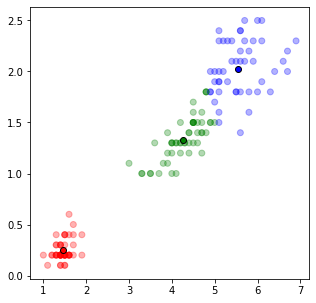

In [42]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

# Stage 3: Update Stage

### Update function : Updating the centroids

<font color=blue> Now, some points which belonged to cluster 1 may have been assigned to cluster 2 or vice-versa. So, we need to again update the means in order to get the accurate clusters. This time we will use the closest point which we calculated using eucledian distance. </font>

In [43]:
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [44]:
centroids = update(centroids)
centroids

{0: [1.4620000000000002, 0.2459999999999999],
 1: [4.269230769230769, 1.342307692307692],
 2: [5.595833333333332, 2.0374999999999996]}

### Visualising the graph with updated centroids

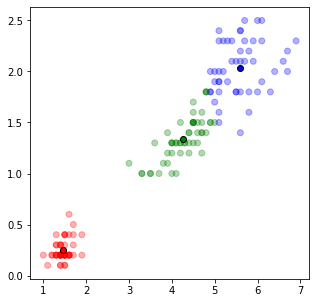

In [45]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

## Repeat assignment stage to to ressign the points with clusters

<font color=blue>Now that we updated centroids, it is quite possible that the points can shift to the wrong clusters. so we need to repeat assignment process again and update again. This process runs in loop till there is no change is found in the updated centroid values.</font>

In [46]:
df = assignment(df, centroids)

### Visualising the updated graph

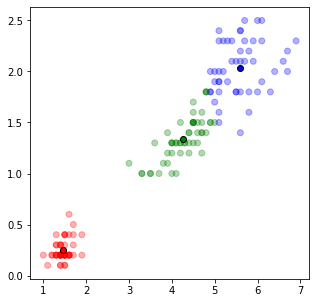

In [47]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
plt.show()

## Continuing until all assigned clusters don't change any more

<font color = blue> Now, we will save a copy of our closest centroid of respective points named as 'closest' into another variable named as closest_centroid. We will update centroids in loop and also assign the data points to updated centroid in loop till we find that closest_centroid(old closest centroid) equals to new updated centroid. </font>

In [48]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

# Final Result :

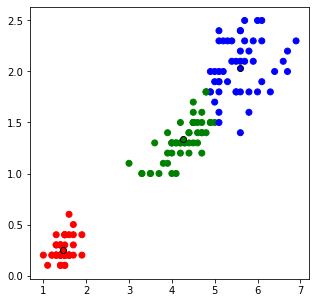

In [54]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i],edgecolor='k')

plt.show()

Thank You.